<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack, Justin Pounders_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [1]:
sac_csv = './datasets/sacramento_real_estate_transactions.csv'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv(sac_csv)

In [4]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


### Findings: 
* Firstly, I noticed that the sale_date is stored as object, it's better to convert to date type.

In [6]:
def sale_date_convert(df):
    df['sale_date'] = pd.to_datetime(df['sale_date'],infer_datetime_format=True)
    return df

df = sale_date_convert(df)

* Secondly, zip code is better to be object instead of int

In [7]:
def zip_convert(df):
    df['zip'] = df['zip'].astype('O')
    return df

df = zip_convert(df)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1312.918782,856.123224,-984.000000,950.000000,1304.000000,1718.000000,5822.000000
price,985.0,233715.951269,139088.818896,-210944.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.445121,5.103637,-121.503471,38.482704,38.625932,38.695589,39.020808
longitude,985.0,-121.193371,5.100670,-121.551704,-121.446119,-121.375799,-121.294893,38.668433


* Thirdly, there are negative values in sq_ft and price which doesn't make ssense, it better to remove them

In [9]:
df = df[(df['sq__ft'] > 0) & (df['price'] > 0)]

_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

In [10]:
df[['price','sq__ft']].describe().T

,count,mean,std,min,25%,50%,75%,max
price,813.0,229471.130381,119897.576889,2000.0,148750.0,207973.0,285000.0,884790.0
sq__ft,813.0,1591.892989,663.908347,484.0,1144.0,1419.0,1851.0,5822.0


Price of 2000 is a outlier, remove it.

In [11]:
df = df[df['price'] > 2000]

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

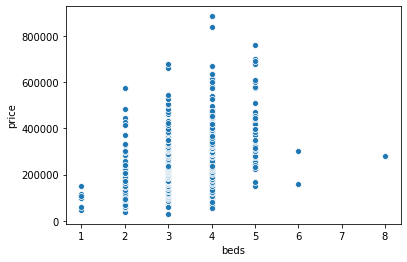

In [12]:
sns.scatterplot(df['beds'], df['price'])

In [13]:
df.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

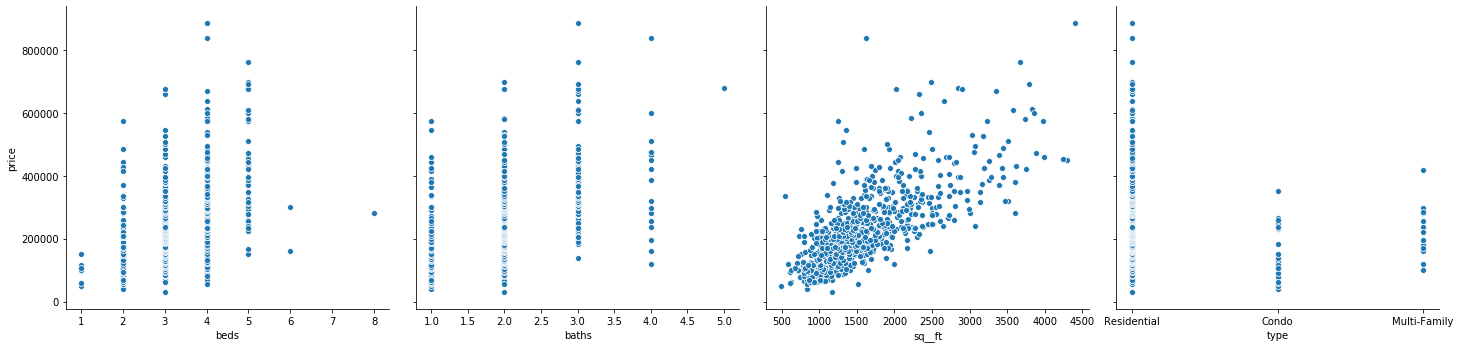

In [14]:
# plt.figure(figsize=(20,9));
sns.pairplot(df, x_vars=['beds','baths','sq__ft','type'], y_vars=['price'],height=5);

In [15]:
df_new = df[['sq__ft','price']]

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

In [16]:
# sq_ft would be the best predictor of Y in an SLR model because the linear realationship is more obvious from the scatter plot

### 5. Build a function that will take in two lists, `Y` and `X`, and return the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [17]:
def slr(x,y):
    x_mean = sum(x)/len(x)
    y_mean = sum(y)/len(y)
    
    beta_1_numerator = 0
    beta_1_denominator = 0
    
    for i in range(len(x)):
        beta_1_numerator += ((x[i]-x_mean)*(y[i]-y_mean))
        beta_1_denominator += (x[i] - x_mean)**2
    beta_1 = beta_1_numerator / beta_1_denominator
    
    beta_0 = y_mean - beta_1 * x_mean
    
    return beta_0,beta_1

In [18]:
x = df_new['sq__ft'].to_list()
y = df_new['price'].to_list()

intercept,slope = slr(x,y)

In [19]:
print(f'Slope is {slope} and intercept is {intercept}')

Slope is 134.75120754188796 and intercept is 15943.749961489637


### 6. Interpret the intercept. Interpret the slope.

* 1 square feet increase in the sq__ft will result in a average of134.13 increase in the price. And on average, the price starts from 17313.71

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

Prediction:
* My client wants to know how much his 3000 ft^2 house might be. Using the model above: 29497 + 3000 * 124.628 = 406384

Inference:
* My client wants to know what affect the price, our model indicates that sq feet is the most import feature: 1 square feet increase in the sq__ft will result in a average of 125.62 increase in the price and on average, the price starts from 29497.56.

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

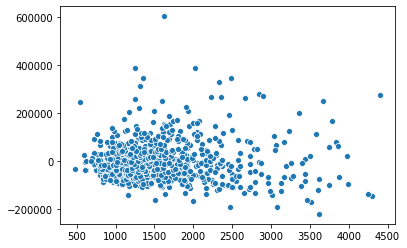

In [20]:
y_prdct = [intercept+slope*xi for xi in x]

residual = []
for i in range(len(y_prdct)):
    residual.append(y[i] - y_prdct[i])
    
sns.scatterplot(x, residual);

---

> The material following this point can be completed after the second lesson on Monday.

---

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [21]:
pd.get_dummies(df['type'])

,Condo,Multi-Family,Residential
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
980,0,0,1
981,0,0,1
982,0,0,1
983,0,0,1


---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 10. Remove "Unkown" from four dummy coded variable dataframe and append the rest to the original data.

In [22]:
df_dummies = pd.concat([df_new,pd.get_dummies(df[['city','zip','state','type']],drop_first=True)], axis = 1)

### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model don't forget to load in the statsmodels api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

_I'm going to engineer a new dummy variable for 'HUGE houses'.  Those whose square footage is 3 (positive) standard deviations away from the mean._
```
Mean = 1315
STD = 853
Huge Houses > 3775 sq ft
```

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [24]:
df['baths'].unique()

array([1, 2, 3, 4, 5])

In [25]:
df_final = pd.concat([df_new,pd.get_dummies(df['type'],drop_first=True,prefix='type')], axis = 1)

def huge_house(value):
    if value > 3775:
        return 1
    else:
        return 0
    
df_final['huge_house'] = df['sq__ft'].map(huge_house)

df_final = pd.concat([df_final,df[['beds','baths']]], axis = 1)



In [26]:
X_new = df_final.drop('price',axis=1)
y_new = df_final['price']

X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,train_size=0.8,random_state=42)

In [27]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [28]:
print(f'Slope is {linreg.coef_} and intercept is {linreg.intercept_}')

Slope is [   153.50814336 -22060.41467012  39991.32305399 -35569.53100541
 -30637.65115426  13351.28068728] and intercept is 23408.344671259692


In [29]:
# evalute the model
linreg.score(X_train,y_train), linreg.score(X_test,y_test)

(0.5485052101545216, 0.5566898573277145)

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

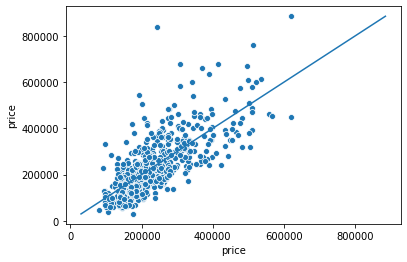

In [30]:
predict_new = linreg.predict(X_train)
sns.scatterplot(predict_new,y_train);
sns.lineplot(y_train,y_train);

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

**SLR AND MLR**:  

- *Linearity: Y must have an approximately linear relationship with each independent X_i.*
- *Independence: Errors (residuals) e_i and e_j must be independent of one another for any i != j.*
- *Normality: The errors (residuals) follow a Normal distribution.*
- *Equality of Variances: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the X_i. (There should be no discernable relationship between X_1 and the residuals.)*

**MLR ONLY**:  
- *Independence Part 2: The independent variables X_i and X_j must be independent of one another for any i != j*





### 14. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

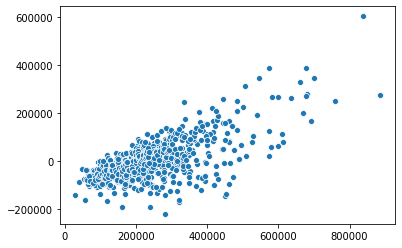

In [33]:

sns.scatterplot(y,residual);

# Equality of Variances assumption is met

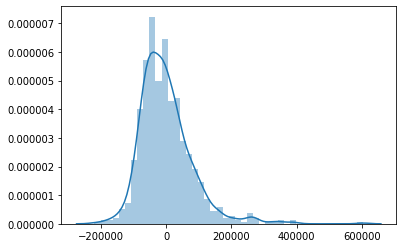

In [34]:
sns.distplot(residual)

# The residuals are pretty much normally distributed.(a little bit right skewed)

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [35]:
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y_train,sm.add_constant(X_train)).fit()

/Users/czc/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     130.0
Date:                Tue, 16 Mar 2021   Prob (F-statistic):          2.19e-107
Time:                        20:27:12   Log-Likelihood:                -8257.4
No. Observations:                 649   AIC:                         1.653e+04
Df Residuals:                     642   BIC:                         1.656e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.341e+04   1.63e+04      1.433      0.152   -8669.285    5.55e+04
sq__ft              153.5081      8.917     17.216      0.000     135.999     171.018
type_Multi-Family -2.206e+04   3.02e+04     -0.730      0.466   -8.14e+04    3.73e+04
type_Residential   3.999e+04   1.52e+04      2.626      0.009    1.01e+04    6.99e+04
huge_house        -3.557e+04   3.48e+04     -1.023      0.307   -1.04e+05    3.27e+04
beds              -3.064e+04   6047.984     -5.066      0.000   -4.25e+04   -1.88e+04
baths              1.335e+04   7369.087      1.812      0.070   -1119.145    2.78e+04
==============================================================================
Omnibus:                      243.425   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1284.839
Skew:                           1.600   Prob(JB):                    1.00e-279
Kurtosis:                       9.105   Cond. No.                     1.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---

> The material following this point can be completed after the first lesson on Tuesday.

---

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [37]:
def r2_adj(model,x,y):
    y_mean = sum(y)/len(y)
    
    predict_y = model.predict(sm.add_constant(x))
    SS_residual = sum((y-predict_y)**2)
    SS_total = sum((y-y_mean)**2)
    
    r2 = 1 - SS_residual / SS_total
    r2_adj = 1 - (1 - r2) * (len(y) - 1)/(len(y)-x.shape[1] - 1)
    
    return r2_adj

In [38]:
r2_adj(model,X_train,y_train)

0.54428563267933

### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return six regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

In [44]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

In [69]:
def metrics(model,x,y):
    y_predi = model.predict(sm.add_constant(x))
    
    r2_score_is = r2_score(y,y_predi)
    r2_adj_is = r2_adj(model,x,y)
    mse = mean_squared_error(y,y_predi)
    rmse = np.sqrt(mse)
    f_value = model.fvalue
    f_prob = model.f_pvalue
    
    print(f'r2 score is {r2_score_is},r2 adjusted score is {r2_adj_is}')
    print(f'MSE is {mse}, RMSE is {rmse}')
    print(f'F statistics value is {f_value}, f probability is {f_prob}')
    

In [70]:
metrics(model,X_train,y_train)

r2 score is 0.5485052101545217,r2 adjusted score is 0.54428563267933
MSE is 6588620954.407666, RMSE is 81170.32064990052
F statistics value is 129.99055317254084, f probability is 2.1884709615163043e-107


/Users/czc/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/czc/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### 18. Model Iteration

Evaluate your current home price prediction model by calculating all six regression metrics.  Now adjust your model (e.g. add or take away features) and see how to metrics change.

In [73]:
# drop huge_house

In [72]:
X_train_alter = X_train.drop('huge_house',axis=1)

In [74]:
model_2 = sm.OLS(y_train,sm.add_constant(X_train_alter)).fit()

/Users/czc/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [76]:
metrics(model_2,X_train_alter,y_train)

r2 score is 0.5477692091914723,r2 adjusted score is 0.5442526400561023
MSE is 6599361347.15787, RMSE is 81236.45331473963
F statistics value is 155.7680762428417, f probability is 2.8022521333031724e-108


/Users/czc/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [77]:
# the metrics didn't change too much, however the F values is larger which means coefs are more significant than previous one

### 19. Bias vs. Variance

At this point, do you think your model is high bias, high variance or in the sweet spot?  If you are doing this after Wednesday, can you provide evidence to support your belief?

In [ ]:
# It's high bias. I would use cross validation to support this.